<a href="https://colab.research.google.com/github/TheFl1y/roboflowChess/blob/third0710/Yolo_V8_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sun Jun  2 13:22:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
# Pip install method (recommended)
import os
HOME = os.getcwd()
print(HOME)
!pip install ultralytics==8.0.196 --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 107.9ms
Speed: 3.5ms preprocess, 107.9ms inference, 554.5ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [9]:
rm -rf *

In [2]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00


In [24]:
%cd {HOME}
!mkdir {HOME}/testset
%cd {HOME}/testset
from roboflow import Roboflow
rf = Roboflow(api_key="cCMDAmVNkDk8ipvjKrbi")
project = rf.workspace("encheng").project("chess-full-msv61")
version = project.version(4)
dataset = version.download("yolov8")

/content
/content/testset
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Pieces-4 in yolov8:: 100%|██████████| 1395/1395 [00:00<00:00, 8497.92it/s]


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="cCMDAmVNkDk8ipvjKrbi")
project = rf.workspace("encheng").project("chess-full-msv61")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chess-Pieces-4 in yolov8:: 100%|██████████| 1395/1395 [00:00<00:00, 4542.27it/s]


# 在Classes新增ERROR，編號為7

In [5]:
import os
import random

def modify_labels_entrywise_with_logging(dataset_path, new_class=7, modification_rate=0.1, log_file_path='modification_log.txt'):

    label_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(dataset_path) for f in filenames if f.endswith('.txt')]

    with open(log_file_path, 'w') as log:
        log.write("File,Line Index,Original Class,Modified Class\n")

        for file_path in label_files:
            with open(file_path, 'r') as file:
                lines = file.readlines()

            num_to_modify = int(len(lines) * modification_rate)
            lines_to_modify = random.sample(range(len(lines)), num_to_modify)

            #   紀錄
            with open(file_path, 'w') as file:
                for idx, line in enumerate(lines):
                    original_line = line.strip()
                    parts = original_line.split()
                    if idx in lines_to_modify and len(parts) > 0:
                        original_class = parts[0]
                        parts[0] = str(new_class)
                        log.write(f"{file_path},{idx},{original_class},{new_class}\n")
                    file.write(' '.join(parts) + '\n')

dataset_path = '/content/datasets/Chess-Pieces-4/train/labels'
modify_labels_entrywise_with_logging(dataset_path)


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 288MB/s]
New https://pypi.org/project/ultralytics/8.2.53 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Chess-Pieces-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch571.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch572.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1720517733.4d5b95027e10.3045.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch570.jpg


/content


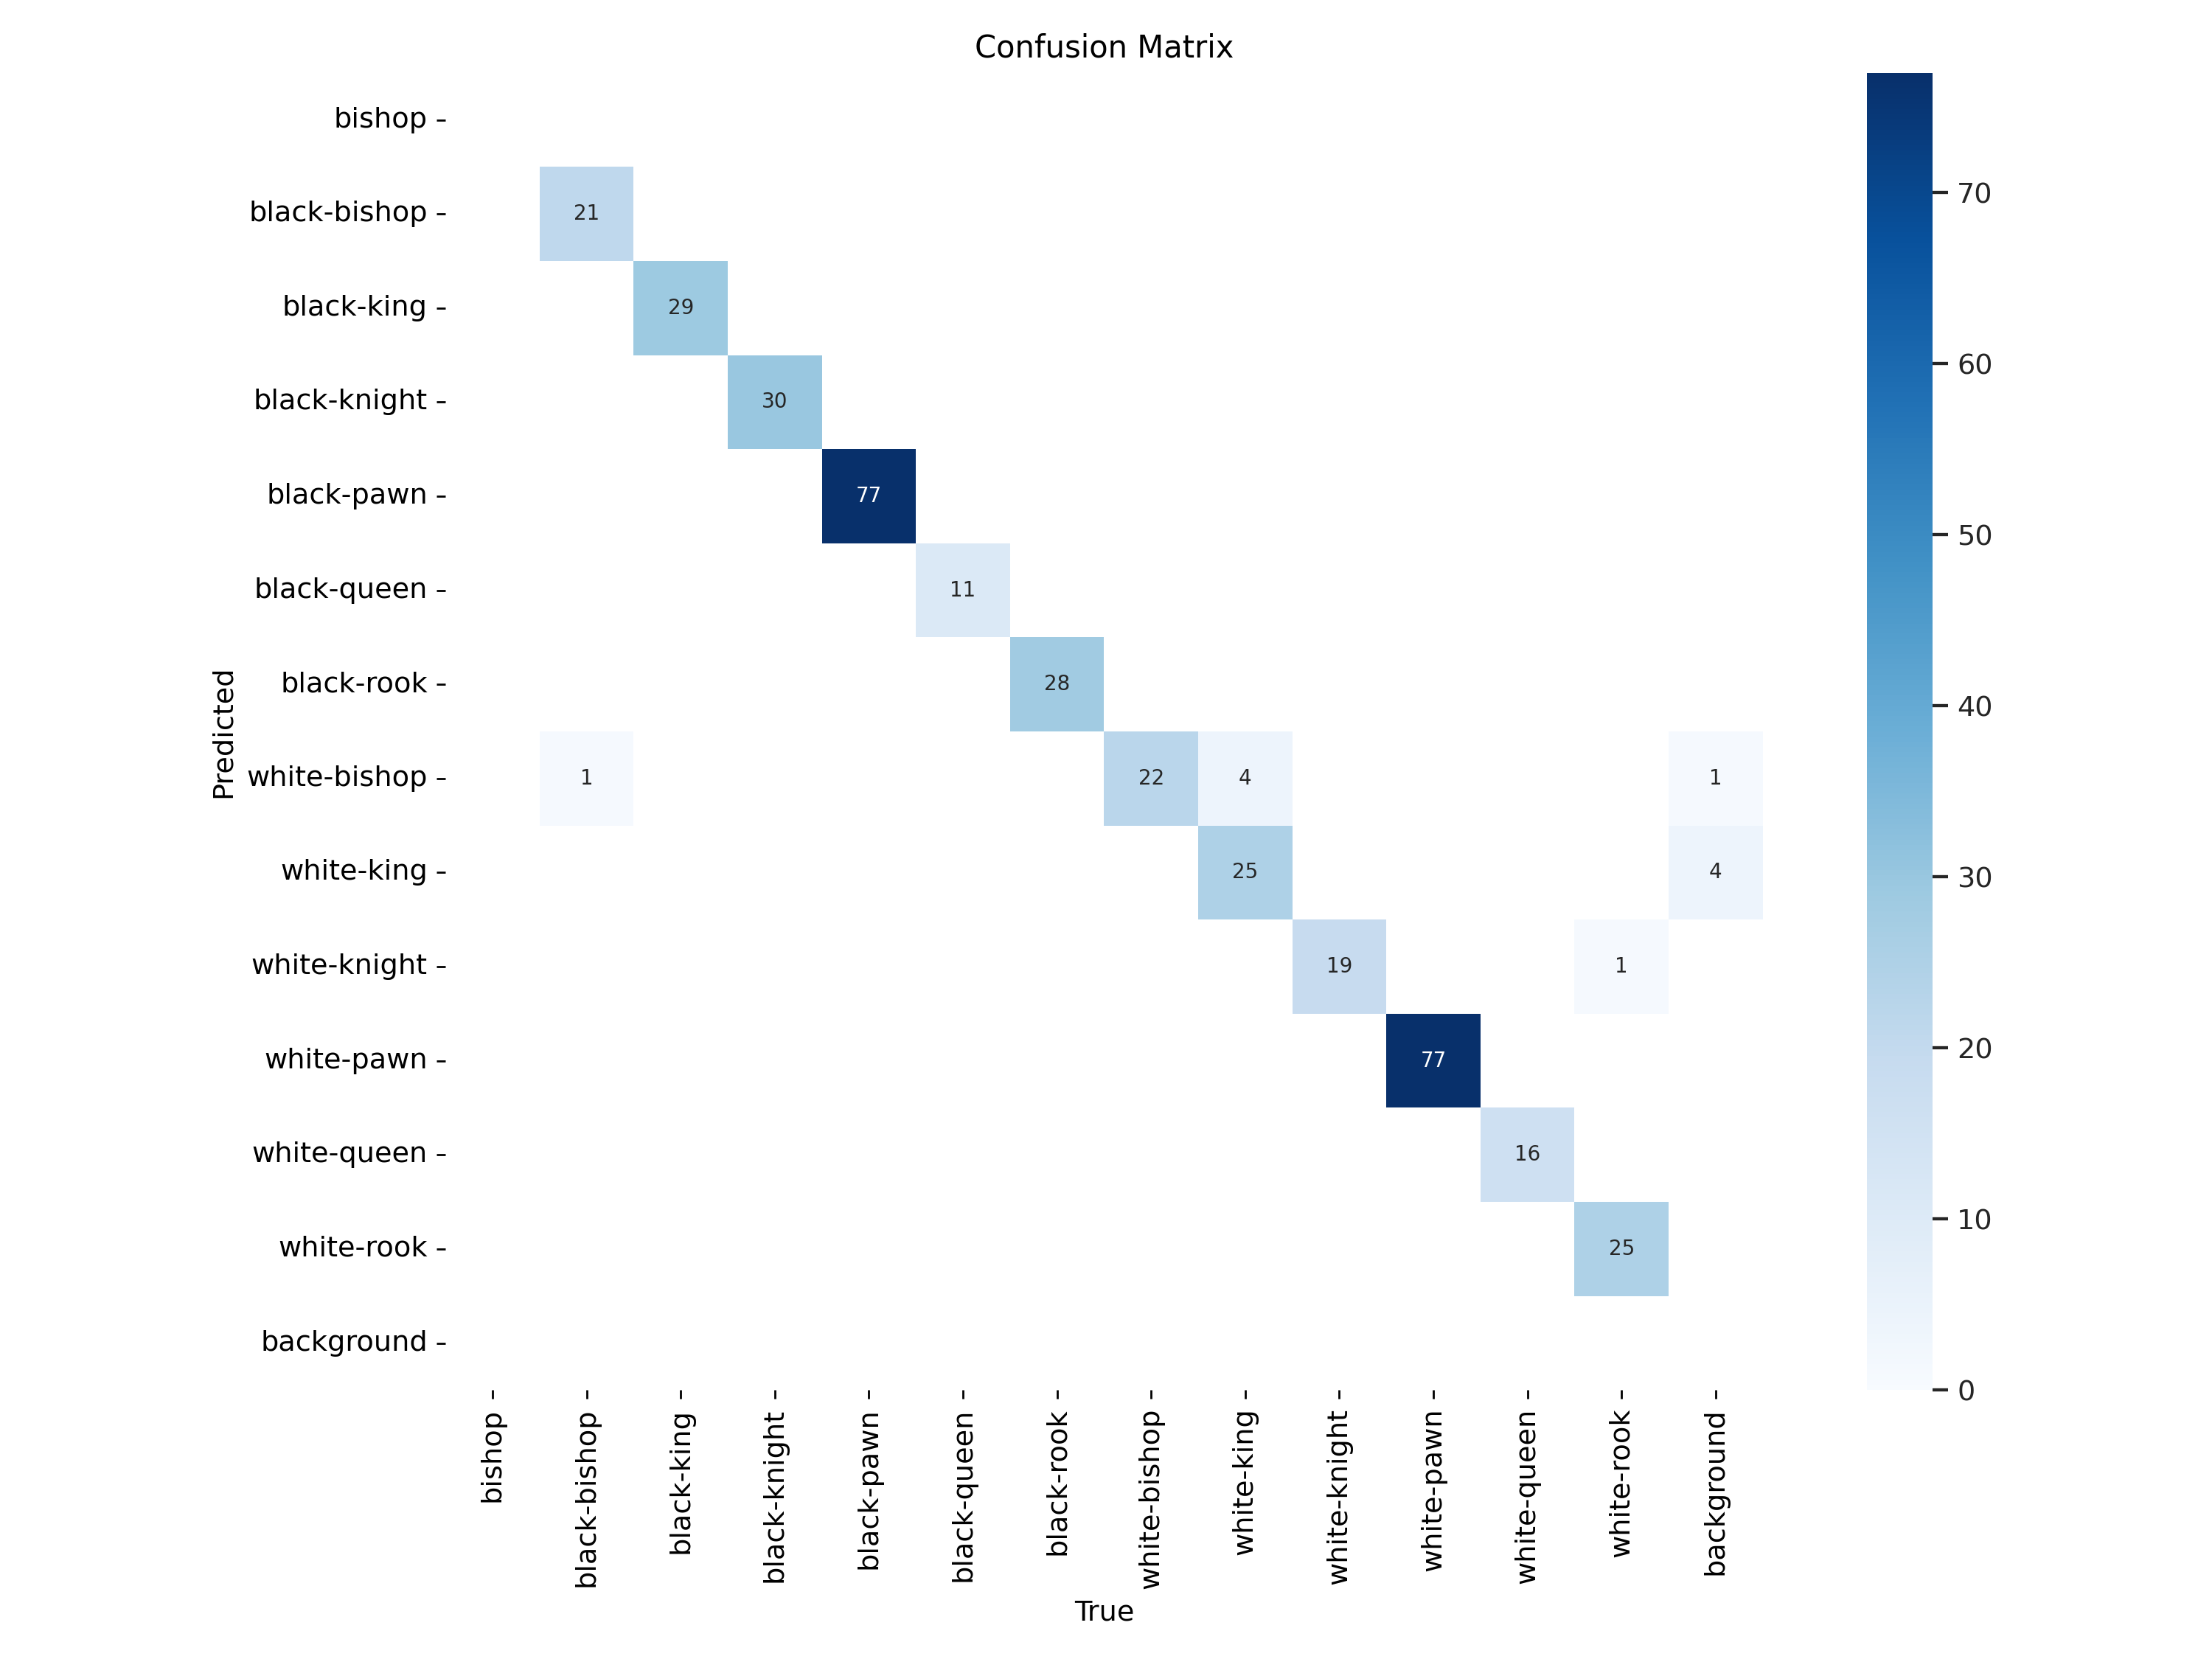

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


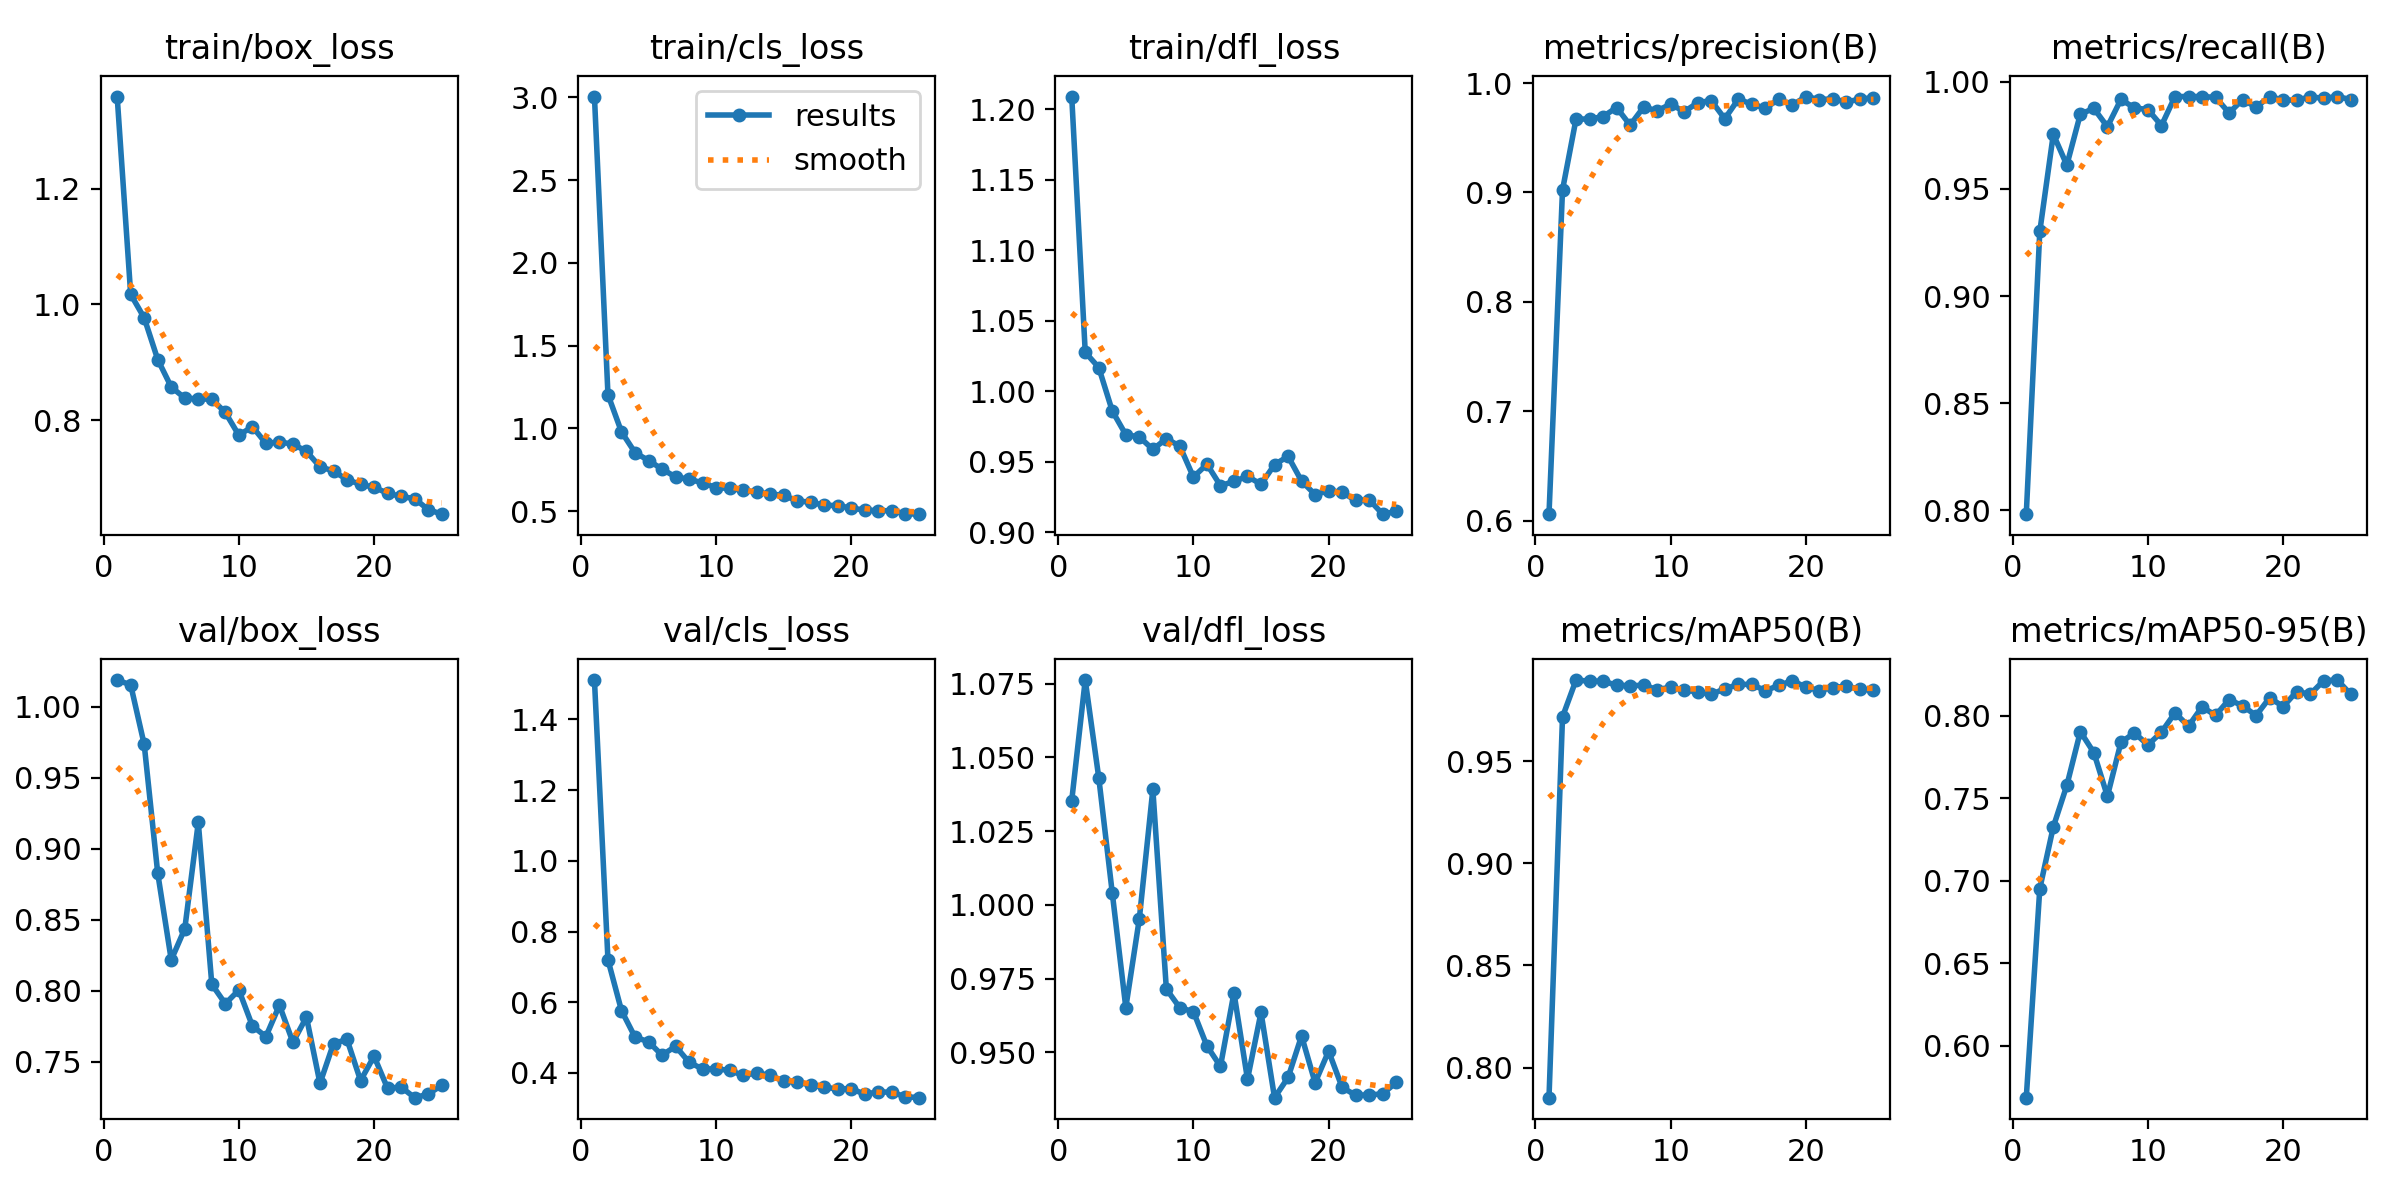

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


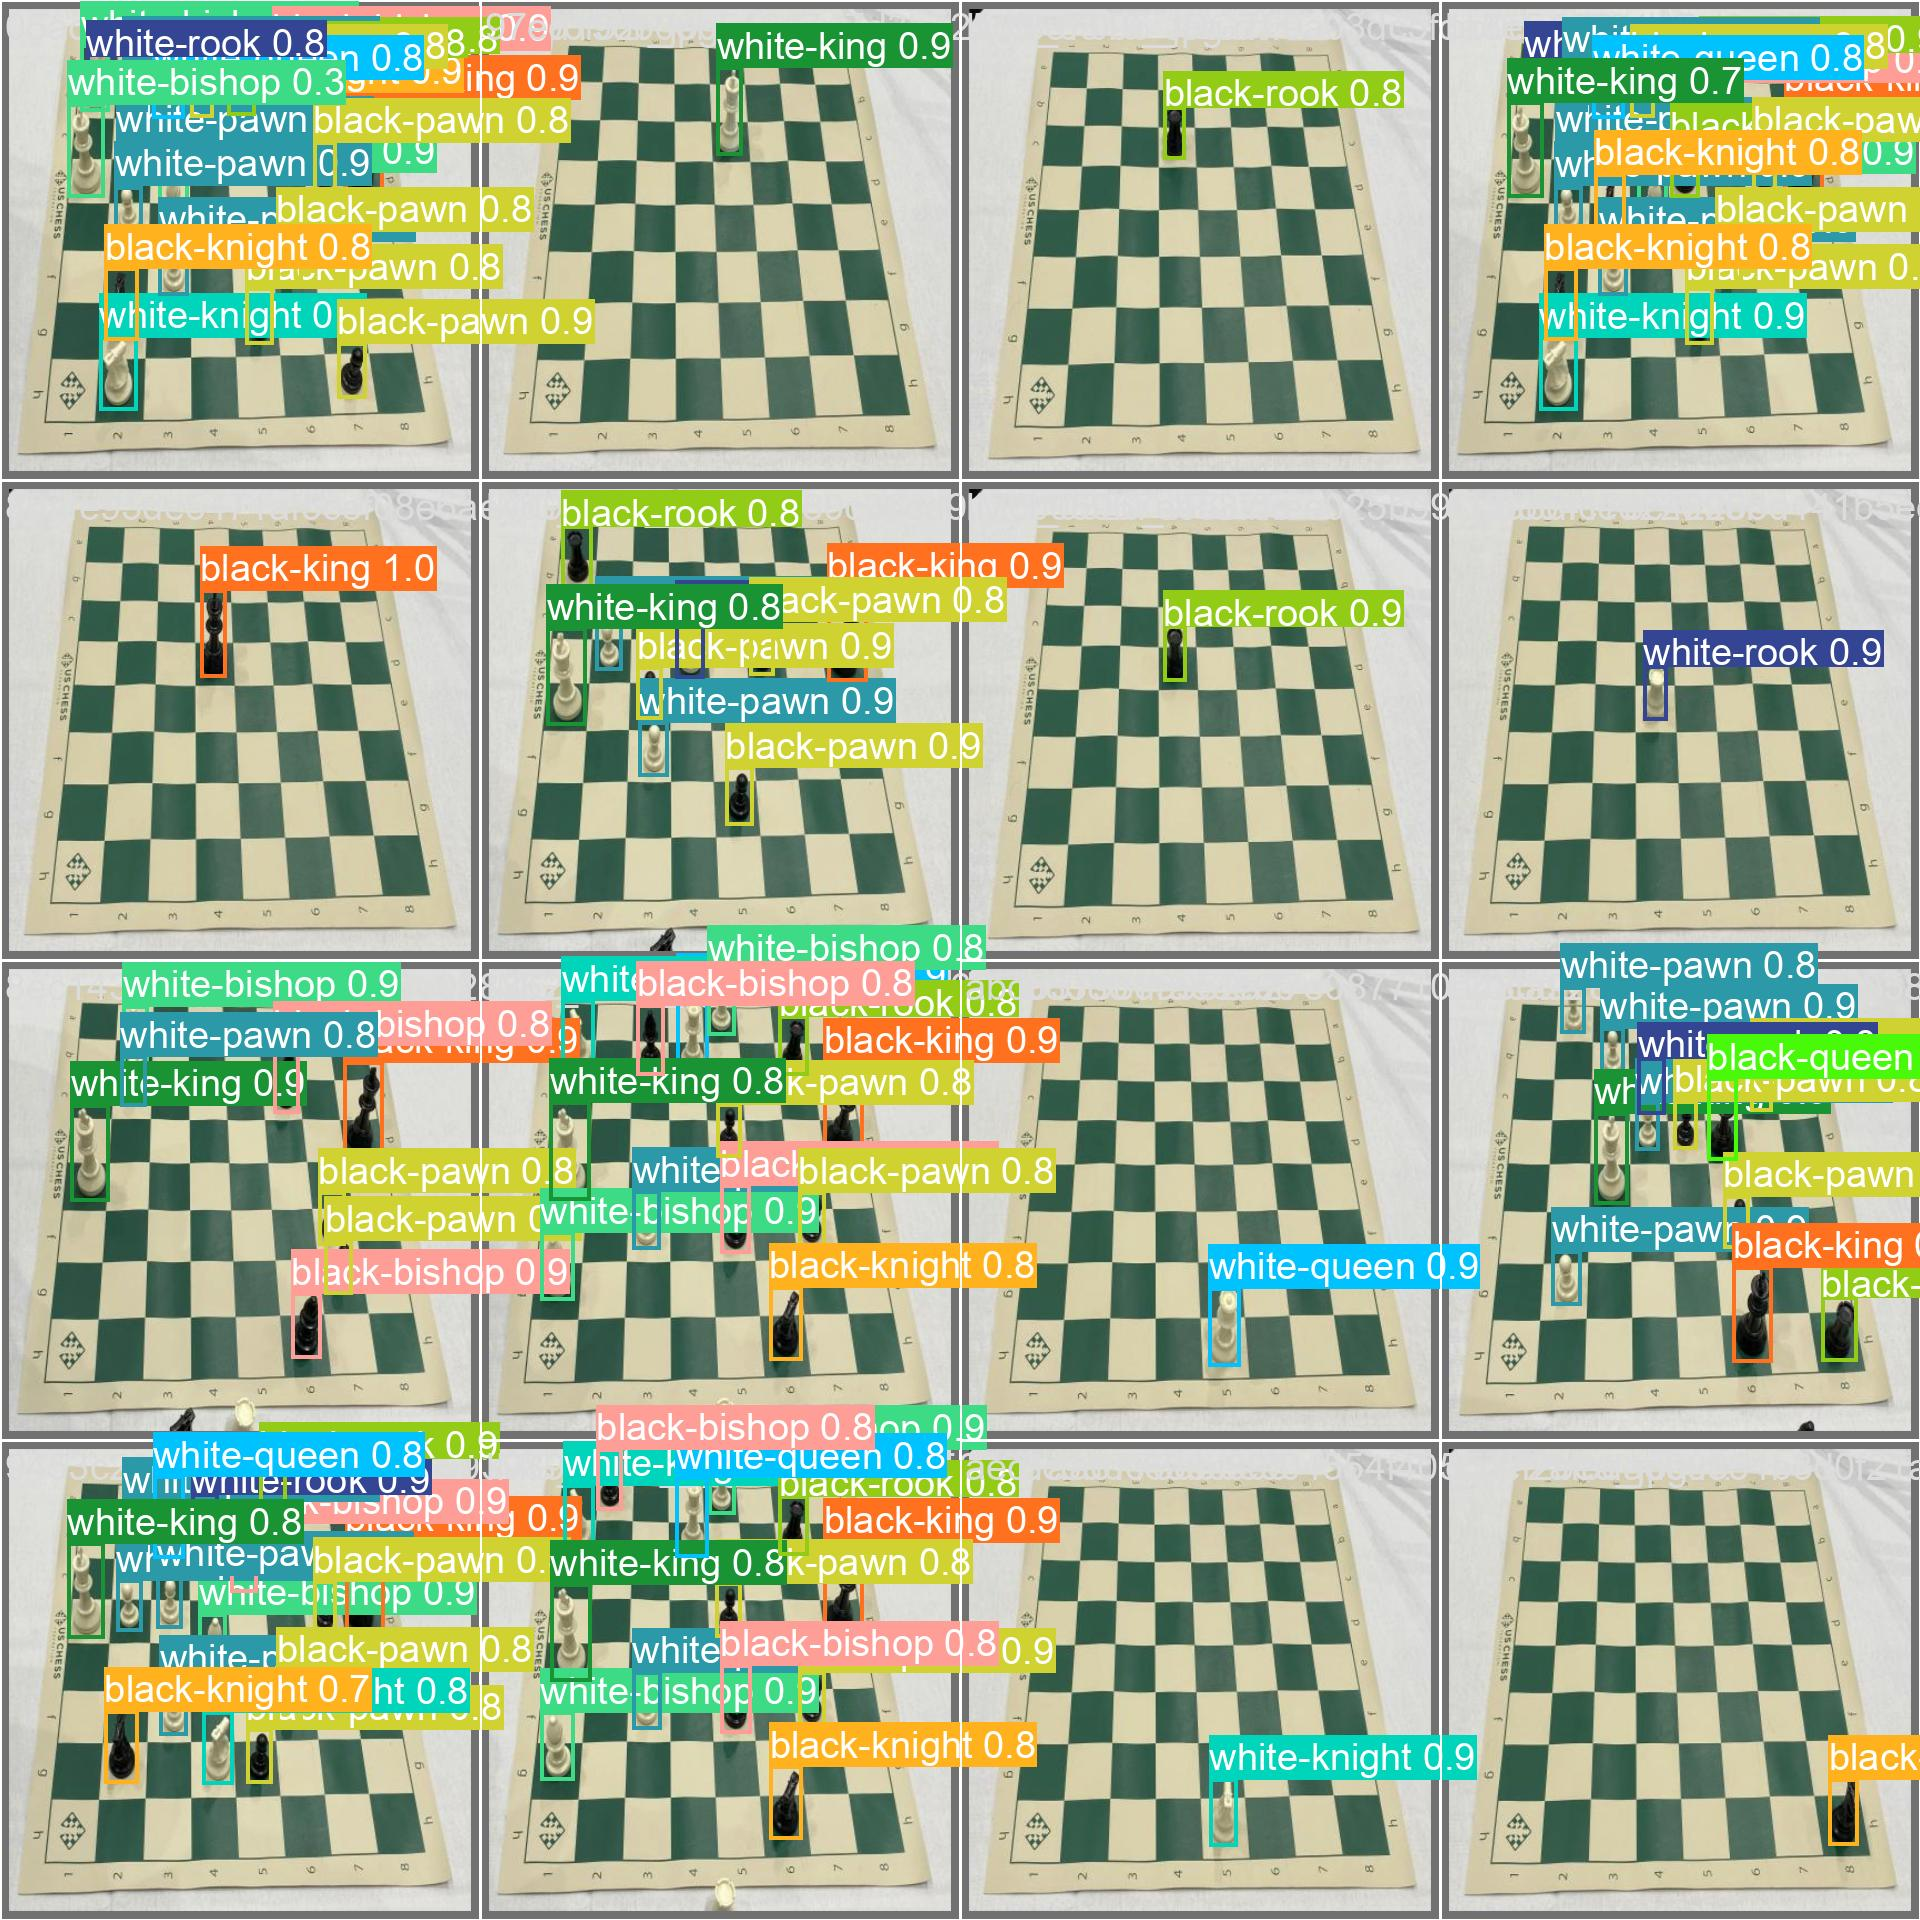

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Chess-Pieces-4/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:08<00:00,  2.23s/it]
                   all         58        386      0.985      0.993      0.985      0.821
          black-bishop         58         22      0.993      0.955      0.961        0.7
            black-king         58         29      0.998          1      0.995      0.878
          black-knight         58         30      0.994          1      0.995      0.861
            black-pawn         58         77      0.998          1      0.995      0.821
           black-queen         58         11      0.993          1      0.995      0.853
            black-rook        

## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/29 /content/datasets/Chess-Pieces-4/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.4f987435151d8ad286212857cd6f35af.jpg: 800x800 1 white-bishop, 22.5ms
image 2/29 /content/datasets/Chess-Pieces-4/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.87314ddbb818074042bc6c0696dc26ee.jpg: 800x800 1 white-rook, 22.8ms
image 3/29 /content/datasets/Chess-Pieces-4/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.d2b4efda1b988c5ef13b34a162233ba4.jpg: 800x800 2 black-bishops, 1 black-king, 2 black-knights, 8 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 8 white-pawns, 1 white-queen, 2 white-rooks, 22.5ms
image 4/29 /content/datasets/Chess-Pieces-4/test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.d2eb256605cc5f31e1bc

**NOTE:** Let's take a look at few results.

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [15]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/encheng/chess-full-msv61/4


# Model3對資料沒有作更改

In [36]:
random_test_image_path = '/content/datasets/Chess-Pieces-4/train/images/239c409d5c09b493fed01a70a3cda4bc_jpg.rf.819d0a5a4ba0329ea3b71a8979b1dd7d.jpg'
url = f"https://detect.roboflow.com/chess-full-msv61/3?api_key=cCMDAmVNkDk8ipvjKrbi"
with open(random_test_image_path, "rb") as image_file:
    response = requests.post(url, files={"file": image_file})

pred = response.json()
print(json.dumps(pred, indent=4))


{
    "inference_id": "dd380956-7d1d-4090-843f-1c17c75f5354",
    "time": 0.09141948100023001,
    "image": {
        "width": 416,
        "height": 416
    },
    "predictions": [
        {
            "x": 337.5,
            "y": 115.5,
            "width": 27.0,
            "height": 71.0,
            "confidence": 0.9511744976043701,
            "class": "white-queen",
            "class_id": 11,
            "detection_id": "abb42c6d-3319-47b9-af87-ef70aa0fed94"
        },
        {
            "x": 265.5,
            "y": 23.0,
            "width": 21.0,
            "height": 46.0,
            "confidence": 0.9431483149528503,
            "class": "white-bishop",
            "class_id": 7,
            "detection_id": "07df0730-a7bf-4bf0-837e-ef1315006a34"
        },
        {
            "x": 87.5,
            "y": 153.5,
            "width": 33.0,
            "height": 81.0,
            "confidence": 0.9386690855026245,
            "class": "black-king",
            "class_id": 

# MODEL4 對資料作錯誤標記

In [35]:
random_test_image_path = '/content/datasets/Chess-Pieces-4/train/images/239c409d5c09b493fed01a70a3cda4bc_jpg.rf.819d0a5a4ba0329ea3b71a8979b1dd7d.jpg'
url = f"https://detect.roboflow.com/chess-full-msv61/4?api_key=cCMDAmVNkDk8ipvjKrbi"
with open(random_test_image_path, "rb") as image_file:
    response = requests.post(url, files={"file": image_file})

pred = response.json()
print(json.dumps(pred, indent=4))

{
    "inference_id": "afaa1cdc-59f8-4244-a58a-f554836c1bf3",
    "time": 0.09371595100014929,
    "image": {
        "width": 416,
        "height": 416
    },
    "predictions": [
        {
            "x": 265.0,
            "y": 23.0,
            "width": 22.0,
            "height": 46.0,
            "confidence": 0.9053613543510437,
            "class": "white-bishop",
            "class_id": 7,
            "detection_id": "b7a4feae-fbb3-4787-b4a8-e1d0ad0e1305"
        },
        {
            "x": 234.0,
            "y": 125.5,
            "width": 18.0,
            "height": 41.0,
            "confidence": 0.8997782468795776,
            "class": "white-pawn",
            "class_id": 10,
            "detection_id": "aaf0786c-1ded-4e9a-be63-0c79765f4726"
        },
        {
            "x": 305.5,
            "y": 213.5,
            "width": 21.0,
            "height": 41.0,
            "confidence": 0.8976284265518188,
            "class": "white-pawn",
            "class_id": 

In [58]:
random_test_image_path = '/content/roboflowChess/datasets/Chess-Pieces-4/train/images/285d7c487a4e20ad832a74acb527b77f_jpg.rf.474bcb9cb799f2dbb2fa34725b0a4c8f.jpg'
url = f"https://detect.roboflow.com/chess-full-msv61/4?api_key=cCMDAmVNkDk8ipvjKrbi"
with open(random_test_image_path, "rb") as image_file:
    response = requests.post(url, files={"file": image_file})

pred = response.json()
print(json.dumps(pred, indent=4))


{
    "inference_id": "614182d7-4be3-4685-bc03-683424cd0192",
    "time": 0.09956039600001532,
    "image": {
        "width": 416,
        "height": 416
    },
    "predictions": [
        {
            "x": 267.5,
            "y": 233.5,
            "width": 27.0,
            "height": 49.0,
            "confidence": 0.8955674767494202,
            "class": "white-pawn",
            "class_id": 10,
            "detection_id": "e7c49bec-fc50-4feb-89a8-f680910afaeb"
        },
        {
            "x": 308.0,
            "y": 141.5,
            "width": 24.0,
            "height": 47.0,
            "confidence": 0.8937296867370605,
            "class": "white-pawn",
            "class_id": 10,
            "detection_id": "b87d003d-7576-4c91-b9cb-9bd97b6d4ce8"
        },
        {
            "x": 271.5,
            "y": 183.0,
            "width": 25.0,
            "height": 50.0,
            "confidence": 0.87663334608078,
            "class": "black-pawn",
            "class_id": 4,

In [57]:
random_test_image_path = '/content/roboflowChess/datasets/Chess-Pieces-4/train/images/285d7c487a4e20ad832a74acb527b77f_jpg.rf.474bcb9cb799f2dbb2fa34725b0a4c8f.jpg'
url = f"https://detect.roboflow.com/chess-full-msv61/3?api_key=cCMDAmVNkDk8ipvjKrbi"
with open(random_test_image_path, "rb") as image_file:
    response = requests.post(url, files={"file": image_file})

pred = response.json()
print(json.dumps(pred, indent=4))


{
    "inference_id": "d22605f2-ae92-49bb-8b02-2585c3ea340f",
    "time": 0.09152376600013667,
    "image": {
        "width": 416,
        "height": 416
    },
    "predictions": [
        {
            "x": 127.5,
            "y": 129.0,
            "width": 35.0,
            "height": 88.0,
            "confidence": 0.924841046333313,
            "class": "black-king",
            "class_id": 2,
            "detection_id": "5144da85-ac55-41f5-91ea-e89a7796502d"
        },
        {
            "x": 345.0,
            "y": 169.5,
            "width": 38.0,
            "height": 89.0,
            "confidence": 0.8998589515686035,
            "class": "white-king",
            "class_id": 8,
            "detection_id": "f35bfd63-9f1d-4e78-8946-6ff13bf99c18"
        },
        {
            "x": 271.5,
            "y": 182.5,
            "width": 25.0,
            "height": 53.0,
            "confidence": 0.8829615712165833,
            "class": "black-pawn",
            "class_id": 4,


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

 0.9053613543510437

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.